In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")  
!pwd  # show current path 

Mounted at /content/gdrive
/content


In [ ]:
!ls

gdrive	sample_data


In [ ]:
%cd "/content/gdrive/MyDrive/dataset"
!ls

/content/gdrive/MyDrive/dataset
20210101_RM.csv       iris.names			   test.csv
adult.data	      oil.csv				   train.csv
adult.names	      out.csv				   transactions.csv
dow_jones_index.data  sample_submission.csv		   wine.data
holidays_events.csv   store-sales-time-series-forecasting  wine.names
iris.data	      stores.csv


In [ ]:
import seaborn as sns
import pandas as pd

In [3]:
import numpy as np

def DistanceKm(lat_or, lon_or, lat_des, lon_des):
    rad_earth = 6371 # radius of the earth
    
    lat_or = lat_or * np.pi/180
    lat_des = lat_des * np.pi/180
    lon_or = lon_or * np.pi/180
    lon_des = lon_des * np.pi/180
    
    lat = lat_des - lat_or
    lon = lon_des - lon_or
    
    a = np.sin(lat/2)**2 + np.cos(lat_or) * np.cos(lat_des) * np.sin(lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a),np.sqrt(1-a))

    # a = sin²(Δlat/2) + cos(lat1) · cos(lat2) · sin²(Δlong/2)
    # c = 2 · atan2(√a, √(1−a))
    distance = c * rad_earth
    return distance

In [25]:
## 1 unidad de latitud = 111.302 km
## 1/111.302           = 1 km

## 1 unidad de latitud = 96.2973 km
## 1/96.2973           = 1 km

def coor(lat, lon, distance):
  lat_km = 1/ 111.1949
  lon_km = 1/ 96.2973

  lat1 = lat
  lon1 = lon + distance * lon_km

  lat2 = lat
  lon2 = lon - distance * lon_km

  lat3 = lat + distance * lat_km
  lon3 = lon

  return (lat1, lon1), (lat2, lon2), (lat3, lon3)

In [26]:
coor(30, 30, 50)

((30, 30.51922535730493), (30, 29.48077464269507), (30.449660910707237, 30))

In [27]:
DistanceKm(30, 30, 30.449660910707237 , 30)
#DistanceKm(30, 30, 30, 29.48077464269507)
#DistanceKm(30,30,31,30)

50.000011981016684

In [ ]:
df = pd.read_csv('20210101_RM.csv')  
df_idless = df.drop(columns = 'PHONE_ID', inplace=True)

In [ ]:
df.head()

,timestamp,bts_id,lat,lon
0,2021-01-01T17:22:55.000-03:00,CEMG1,-33.3913,-70.6222
1,2021-01-01T17:10:19.000-03:00,CEMG1,-33.3913,-70.6222
2,2021-01-01T00:35:04.000-03:00,CEMG1,-33.3913,-70.6222
3,2021-01-01T17:22:38.000-03:00,CEMG1,-33.3913,-70.6222
4,2021-01-01T17:11:12.000-03:00,CEMG1,-33.3913,-70.6222


In [ ]:
df.describe() ## lat 35.6751° S    lon 71.543° O

,lat,lon
count,4.961813e+07,4.961813e+07
mean,-3.349199e+01,-7.068545e+01
std,1.219281e-01,1.482997e-01
min,-3.402680e+01,-7.148880e+01
25%,-3.356200e+01,-7.073630e+01
50%,-3.346940e+01,-7.066010e+01
75%,-3.341880e+01,-7.058930e+01
max,-3.292550e+01,-7.005880e+01


In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns

#df.boxplot(column="lat")

In [ ]:
df["timestamp"] = pd.to_datetime(df['timestamp'])

In [ ]:
df.head(1)

,timestamp,bts_id,lat,lon
0,2021-01-01 17:22:55-03:00,CEMG1,-33.3913,-70.6222


In [ ]:
df['timestamp'].value_counts().count()

86400

In [ ]:
xd = df['timestamp'].value_counts()



In [ ]:
xd

2021-01-01 00:09:48-03:00    1487
2021-01-01 00:35:17-03:00    1481
2021-01-01 00:09:45-03:00    1479
2021-01-01 00:09:44-03:00    1440
2021-01-01 00:09:47-03:00    1438
                             ... 
2021-01-01 07:56:17-03:00     120
2021-01-01 07:56:16-03:00     119
2021-01-01 07:56:23-03:00     117
2021-01-01 07:55:24-03:00     116
2021-01-01 07:55:23-03:00     114
Name: timestamp, Length: 86400, dtype: int64

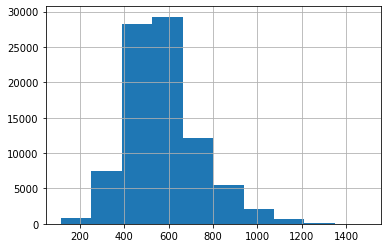

In [ ]:
xd.hist()

In [ ]:
#aux = df['bts_id'].value_counts() > df["bts_id"].value_counts().median() # median = 7851.0

In [ ]:
aux = df['bts_id'].value_counts().sort_values(ascending=False).head(3)
#aux.to_frame
aux = pd.DataFrame(data = aux)
name = ['MORRF','VFRAF','NVMXF']  #new_df=df.assign(Profit=6)
aux = aux.assign(name=name)
aux.columns  = ['num','name']
aux

,num,name
MORRF,228318,MORRF
VFRAF,227329,VFRAF
NVMXF,218627,NVMXF


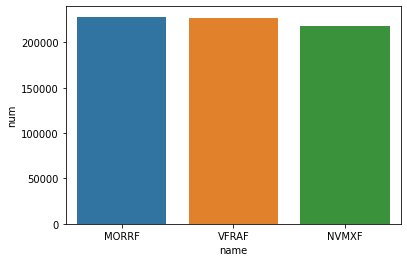

In [ ]:
#aux.hist()
sns.barplot(x = 'name', y='num', data=aux)
#####

In [ ]:
############## para generar csv con los datos de las antenas
# new = df['bts_id'].value_counts()
#new.to_csv('out.csv')

In [ ]:
new = df['bts_id'].value_counts()
new = pd.DataFrame(data = new)
new

,bts_id
MORRF,228318
VFRAF,227329
NVMXF,218627
AMEXF,210797
FUTFF,207333
...,...
MIRA3,1
ACA2D,1
CCA3F,1
CCY5C,1


In [ ]:
df.head()

,timestamp,bts_id,lat,lon
0,2021-01-01 17:22:55-03:00,CEMG1,-33.3913,-70.6222
1,2021-01-01 17:10:19-03:00,CEMG1,-33.3913,-70.6222
2,2021-01-01 00:35:04-03:00,CEMG1,-33.3913,-70.6222
3,2021-01-01 17:22:38-03:00,CEMG1,-33.3913,-70.6222
4,2021-01-01 17:11:12-03:00,CEMG1,-33.3913,-70.6222


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f545cd3be50>]],
      dtype=object)

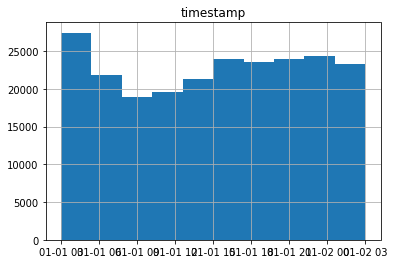

In [ ]:
aux = df[['timestamp','bts_id']]
aux[aux['bts_id'] == 'MORRF'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5489290790>]],
      dtype=object)

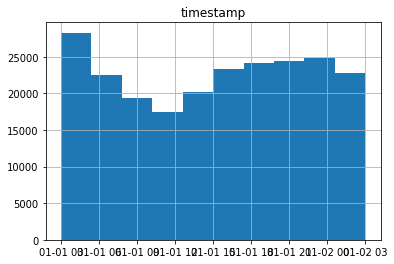

In [ ]:
aux[aux['bts_id'] == 'VFRAF'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f545cd3cc50>]],
      dtype=object)

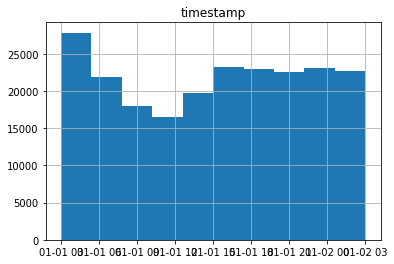

In [ ]:
aux[aux['bts_id'] == 'NVMXF'].hist()

In [ ]:
df['bts_id'].value_counts()

MORRF    228318
VFRAF    227329
NVMXF    218627
AMEXF    210797
FUTFF    207333
          ...  
MIRA3         1
ACA2D         1
CCA3F         1
CCY5C         1
MLPIF         1
Name: bts_id, Length: 1871, dtype: int64

In [ ]:
aux = df[df['bts_id'] == 'MORRF']
new = aux['timestamp'].value_counts()
new = pd.DataFrame(data = new)
new.columns = ['timestamp']

In [ ]:
new

,timestamp
2021-01-01 07:50:17-03:00,31
2021-01-01 07:50:18-03:00,30
2021-01-01 07:50:21-03:00,23
2021-01-01 07:50:13-03:00,22
2021-01-01 07:50:19-03:00,19
...,...
2021-01-01 21:34:34-03:00,1
2021-01-01 21:45:29-03:00,1
2021-01-01 21:36:34-03:00,1
2021-01-01 21:45:03-03:00,1


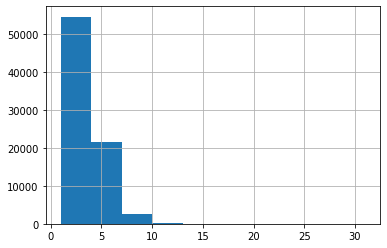

In [ ]:
new.hist()